<a href="https://colab.research.google.com/github/Rohithtechis/INterview-Project/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [337]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white',color_codes=True)

In [338]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [339]:
train.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589
1,2,2017-01-01 01:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879
2,3,2017-01-01 02:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736
3,4,2017-01-01 03:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949
4,5,2017-01-01 04:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000


In [340]:
train.shape

(8708, 11)

In [341]:
train.describe()

,id,temp,temp_feel,humidity,windspeed,demand
count,8708.000000,7506.000000,8606.000000,8669.00000,8508.000000,8708.000000
mean,4354.500000,20.089454,23.531261,60.99354,13.048589,4.452725
std,2513.927405,8.023304,8.737997,19.67989,8.311058,1.493963
min,1.000000,0.820000,0.760000,0.00000,0.000000,0.000000
25%,2177.750000,13.940000,15.910000,46.00000,7.001500,3.637586
50%,4354.500000,20.500000,24.240000,60.00000,12.998000,4.867534
75%,6531.250000,26.240000,31.060000,77.00000,19.001200,5.556828
max,8708.000000,41.000000,45.455000,100.00000,56.996900,6.792344


In [342]:
train.isna().sum()

id               0
timestamp        0
season           0
holiday          0
workingday       0
weather          0
temp          1202
temp_feel      102
humidity        39
windspeed      200
demand           0
dtype: int64

In [343]:
train.fillna(train['temp'].mean(),inplace=True)
train.fillna(train['temp_feel'].mean(),inplace=True)
train.fillna(train['humidity'].mean(),inplace=True)
train.fillna(train['windspeed'].mean(),inplace=True)

In [344]:
train.isna().sum()

id            0
timestamp     0
season        0
holiday       0
workingday    0
weather       0
temp          0
temp_feel     0
humidity      0
windspeed     0
demand        0
dtype: int64

In [345]:
def timefeatures(train):
  train['datetime']=pd.to_datetime(train['timestamp'])
  train['day_of_week']=train['datetime'].dt.dayofweek
  train['day_of_year']=train['datetime'].dt.dayofyear
  train['month']=train['datetime'].dt.month
  train['hour']=train['datetime'].dt.hour
  return train

In [346]:
train=timefeatures(train)
train.drop(['timestamp','datetime'],axis=1,inplace=True)
train.head()

,id,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand,day_of_week,day_of_year,month,hour
0,1,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589,6,1,1,0
1,2,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879,6,1,1,1
2,3,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736,6,1,1,2
3,4,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949,6,1,1,3
4,5,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000,6,1,1,4


In [347]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8708 non-null   int64  
 1   season       8708 non-null   object 
 2   holiday      8708 non-null   object 
 3   workingday   8708 non-null   object 
 4   weather      8708 non-null   object 
 5   temp         8708 non-null   float64
 6   temp_feel    8708 non-null   float64
 7   humidity     8708 non-null   float64
 8   windspeed    8708 non-null   float64
 9   demand       8708 non-null   float64
 10  day_of_week  8708 non-null   int64  
 11  day_of_year  8708 non-null   int64  
 12  month        8708 non-null   int64  
 13  hour         8708 non-null   int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 952.6+ KB


In [348]:
train.describe()

,id,temp,temp_feel,humidity,windspeed,demand,day_of_week,day_of_year,month,hour
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,4354.500000,20.089454,23.490946,60.810346,13.210300,4.452725,3.018948,149.825678,5.628388,11.545590
std,2513.927405,7.448937,8.694555,19.824833,8.282489,1.493963,2.003897,97.968074,3.220104,6.916298
min,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2177.750000,14.760000,16.665000,46.000000,7.001500,3.637586,1.000000,68.000000,3.000000,6.000000
50%,4354.500000,20.089454,24.240000,60.000000,12.998000,4.867534,3.000000,136.000000,5.000000,12.000000
75%,6531.250000,25.420000,31.060000,77.000000,19.001200,5.556828,5.000000,217.000000,8.000000,18.000000
max,8708.000000,41.000000,45.455000,100.000000,56.996900,6.792344,6.000000,353.000000,12.000000,23.000000


In [349]:
train.shape

(8708, 14)

In [350]:
train_c=train.select_dtypes(include='object')

In [351]:
train_c.head()

,season,holiday,workingday,weather
0,spring,No,No,Clear or partly cloudy
1,spring,No,No,Clear or partly cloudy
2,spring,No,No,Clear or partly cloudy
3,spring,No,No,Clear or partly cloudy
4,spring,No,No,Clear or partly cloudy


In [352]:
train2=train
for cols in train_c:
  dummies =pd.get_dummies(train[cols],drop_first=True)
  train2 = pd.concat([train2,dummies],axis='columns')

In [353]:
train2.head()

,id,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand,day_of_week,day_of_year,month,hour,spring,summer,winter,Yes,Yes,Light snow or rain,Mist,heavy rain/ice pellets/snow + fog
0,1,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589,6,1,1,0,1,0,0,0,0,0,0,0
1,2,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879,6,1,1,1,1,0,0,0,0,0,0,0
2,3,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736,6,1,1,2,1,0,0,0,0,0,0,0
3,4,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949,6,1,1,3,1,0,0,0,0,0,0,0
4,5,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000,6,1,1,4,1,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


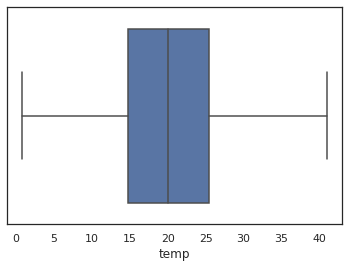

In [354]:
sns.boxplot(train2['temp'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


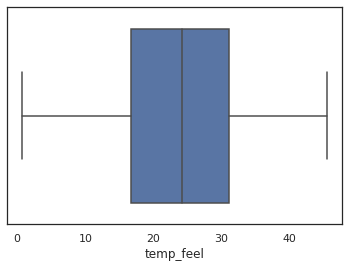

In [355]:
sns.boxplot(train2['temp_feel'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


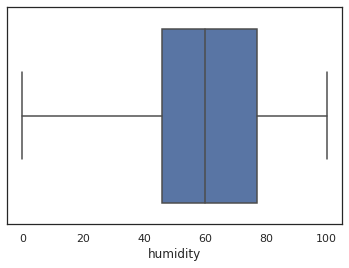

In [356]:
sns.boxplot(train2['humidity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


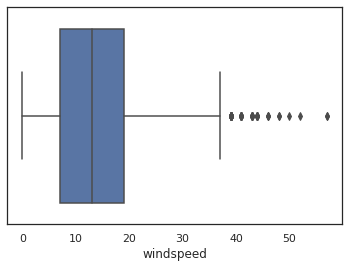

In [357]:
sns.boxplot(train2['windspeed'])

In [358]:
Q1 = np.percentile(train2['windspeed'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(train2['windspeed'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(train2['windspeed'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -10.99805
upper limit: 37.00075


In [359]:
train2=train2[train2.windspeed<up_lim]
train2=train2[train2.windspeed>low_lim]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


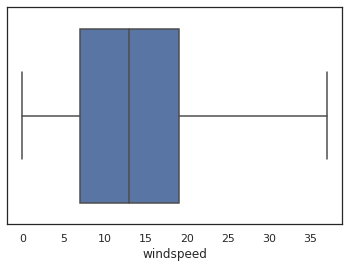

In [360]:
sns.boxplot(train2['windspeed'])

In [361]:
train2=train2.drop(['season','holiday','workingday','weather'],axis=1)

In [362]:
train2.head()

,id,temp,temp_feel,humidity,windspeed,demand,day_of_week,day_of_year,month,hour,spring,summer,winter,Yes,Yes,Light snow or rain,Mist,heavy rain/ice pellets/snow + fog
0,1,9.84,14.395,81.0,0.0,2.772589,6,1,1,0,1,0,0,0,0,0,0,0
1,2,9.02,13.635,80.0,0.0,3.688879,6,1,1,1,1,0,0,0,0,0,0,0
2,3,9.02,13.635,80.0,0.0,3.465736,6,1,1,2,1,0,0,0,0,0,0,0
3,4,9.84,14.395,75.0,0.0,2.564949,6,1,1,3,1,0,0,0,0,0,0,0
4,5,9.84,14.395,75.0,0.0,0.000000,6,1,1,4,1,0,0,0,0,0,0,0


In [363]:
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
scaler = StandardScaler()
  
# To scale data
scaler.fit(train2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [364]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train2, test_size=0.25)

In [365]:
trainx=train2.drop(['demand'],axis=1)
trainy=train2['demand']

val_x=val.drop(['demand'],axis=1)
val_y=val['demand']

In [366]:
print(trainy.shape)
print(trainx.shape)
print(val_y.shape)
print(val_x.shape)

(8648,)
(8648, 17)
(2162,)
(2162, 17)


In [367]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [368]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
df_pred=lr.predict(val_x)

In [369]:
print("The model's metrics values are: ")
print("Accuracy: ", lr.score(val_x,val_y))
print("Mean Absolute Error: ",mean_absolute_error(df_pred , val_y))
print("Mean Squared Error: " ,mean_squared_error(df_pred,val_y))
print("R-squared score: ", r2_score(val_y,df_pred))

The model's metrics values are: 
Accuracy:  0.4862161097203739
Mean Absolute Error:  0.8327677049684336
Mean Squared Error:  1.153312180777851
R-squared score:  0.4862161097203739


In [370]:
import xgboost
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
scaler = MinMaxScaler()
model = XGBRegressor(objective ='reg:squarederror',
                     n_estimators=100, max_depth=3, eta=0.1, subsample=0.7, colsample_bytree=0.8, random_state = 42)
imputer = KNNImputer()
pipe = make_pipeline(imputer,scaler, model)
pipe.fit(trainx, trainy)
pipe.predict(val_x)
pipe.score(val_x,val_y)

0.9227264555776001

In [371]:
df_pred = pipe.predict(val_x)
print("The model's metrics values are: ")
print("Accuracy: ", pipe.score(val_x,val_y))
print("Mean Absolute Error: ",mean_absolute_error(val_y , df_pred))
print("Mean Squared Error: " ,mean_squared_error(val_y,df_pred))
print("R-squared score: ", r2_score(val_y,df_pred))

The model's metrics values are: 
Accuracy:  0.9227264555776001
Mean Absolute Error:  0.3140904383912777
Mean Squared Error:  0.17345915611664753
R-squared score:  0.9227264555776001
